In [2]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
import torch.nn as nn 
import torch.nn.functional as F 
from torchvision import datasets, transforms

In [4]:
if torch.cuda.is_available() :
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print(torch.cuda.get_device_name())

NVIDIA GeForce GTX 1650


In [5]:
print(torch.__version__, DEVICE)

1.12.0 cuda


In [6]:
BATCH_SIZE = 32
EPOCHS = 30

In [9]:
from random import shuffle


train_data = datasets.MNIST(root='../../data/MNIST/',
download=True,
train=True,
transform=transforms.ToTensor())
test_data = datasets.MNIST(root='../../data/MNIST/',
download=True,
train=False,
transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data,
shuffle=True,
batch_size = BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_data,
shuffle=False,
batch_size= BATCH_SIZE)


In [10]:
for (X_train, y_train) in train_loader:
    print(X_train.size(), y_train.size())
    print(X_train.type(), y_train.type())
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.FloatTensor torch.LongTensor


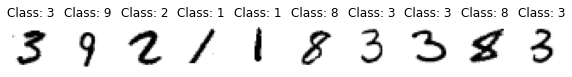

In [16]:
pltsize = 1
plt.figure(figsize=(pltsize*10, pltsize))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
    plt.title('Class: ' + str(y_train[i].item()))

In [33]:
from turtle import forward


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

In [34]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.5)
criterion = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [35]:
def train(model, train_loader, optimzer, log_interval = 100):
    model.train()
    for batch_idx , (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        output = model(image)
        optimizer.zero_grad()
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f'Train_epoch {Epoch}, [{batch_idx*len(image)} / {len(train_loader.dataset)}({(100. * batch_idx / len(train_loader)):.0f}%]\tTrain_Loss : {(loss.item()):.6f}')

In [36]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    test_loss = 0
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [37]:
best_accuracy = 0
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    if test_accuracy > best_accuracy :
        best_accuracy = test_accuracy
        best_model = model
    print(f'\n[EPOCH: {Epoch}, \tTest_LOSS : {(test_loss):.4f}, \tTest_Accuracy: {(test_accuracy):.2f}% \n')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10136\1441269231.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Train_epoch 1, [0 / 60000(0%]	Train_Loss : 2.310716
Train_epoch 1, [3200 / 60000(5%]	Train_Loss : 2.208759
Train_epoch 1, [6400 / 60000(11%]	Train_Loss : 1.934395
Train_epoch 1, [9600 / 60000(16%]	Train_Loss : 1.377145
Train_epoch 1, [12800 / 60000(21%]	Train_Loss : 1.007815
Train_epoch 1, [16000 / 60000(27%]	Train_Loss : 0.541432
Train_epoch 1, [19200 / 60000(32%]	Train_Loss : 0.562971
Train_epoch 1, [22400 / 60000(37%]	Train_Loss : 0.615246
Train_epoch 1, [25600 / 60000(43%]	Train_Loss : 0.541807
Train_epoch 1, [28800 / 60000(48%]	Train_Loss : 0.257186
Train_epoch 1, [32000 / 60000(53%]	Train_Loss : 0.334870
Train_epoch 1, [35200 / 60000(59%]	Train_Loss : 0.475819
Train_epoch 1, [38400 / 60000(64%]	Train_Loss : 0.423631
Train_epoch 1, [41600 / 60000(69%]	Train_Loss : 0.306136
Train_epoch 1, [44800 / 60000(75%]	Train_Loss : 0.169407
Train_epoch 1, [48000 / 60000(80%]	Train_Loss : 0.230138
Train_epoch 1, [51200 / 60000(85%]	Train_Loss : 0.390743
Train_epoch 1, [54400 / 60000(91%]	Train

In [42]:
print('최고정확도 : ',best_accuracy,'\n', best_model.state_dict())

최고정확도 :  98.16 
 OrderedDict([('fc1.weight', tensor([[-0.0005,  0.0098, -0.0089,  ..., -0.0136,  0.0295, -0.0133],
        [ 0.0167, -0.0174, -0.0199,  ..., -0.0168, -0.0183,  0.0116],
        [ 0.0013, -0.0078, -0.0003,  ..., -0.0043,  0.0229, -0.0058],
        ...,
        [ 0.0273, -0.0212, -0.0301,  ...,  0.0078, -0.0087, -0.0300],
        [ 0.0044,  0.0096,  0.0046,  ...,  0.0229,  0.0328, -0.0133],
        [ 0.0188,  0.0251, -0.0076,  ...,  0.0060,  0.0341,  0.0124]],
       device='cuda:0')), ('fc1.bias', tensor([ 1.9565e-02,  3.0391e-02,  2.2487e-02,  5.2870e-02,  1.6046e-02,
         3.4258e-02,  3.4601e-02, -5.6268e-02, -2.6218e-02,  3.8610e-02,
        -2.8681e-02,  5.2916e-02,  3.1114e-03, -1.3799e-02,  3.8485e-03,
         2.1186e-02,  2.8888e-03, -7.7859e-04, -2.8843e-02, -2.7691e-02,
         2.3659e-02,  5.9569e-02,  4.8237e-03,  2.3875e-02,  2.1162e-02,
        -3.6416e-02, -2.5031e-02,  3.5762e-03, -1.1420e-01,  2.4235e-02,
         8.0510e-03,  1.6976e-02,  5.8267e-0